In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
A = "/content/IBM_Attrition_Aryan_Bajaj.ipynb"
B = "/content/Prediction_Using_Decision_Tree.ipynb"
C = "/content/titanic_survival_with_Errors.ipynb"

# Web-Scraping Data

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.service import Service
from selenium.webdriver.common.service import Service as BaseService
from selenium.webdriver.common.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException
from bs4 import BeautifulSoup
import random
import time
import requests
import pandas as pd

In [ ]:
# Install Chromium-Chromedriver if you haven't already
!apt-get update
!apt-get install chromium-chromedriver

# Use the preconfigured Chrome WebDriver in Colab
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run headless for faster scraping
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Initialize the Chrome WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Initialize a list to store data for each URL
data_list = []

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.6 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,027 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:13 https://ppa

In [ ]:
# URLs to scrape
urls = [
    "https://amankharwal.medium.com/data-analysis-projects-with-python-a262a6f9e68c",
    "https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9",
    "https://becominghuman.ai/130-machine-learning-projects-solved-and-explained-897638335f1a"# Add your new link here
]

# Create empty lists to store titles and links
titles = []
links = []

# Iterate over the URLs
for url in urls:
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all links and their titles in the page
        all_links = soup.find_all('a')

        for link in all_links:
            title = link.get_text()
            href = link.get('href')
            # Check if the link contains 'python' and ('analysis' or 'prediction' or 'detection') in the title
            if ('python' in href.lower() or 'analysis' in href.lower()) and ('analysis' in title.lower() or 'prediction' in title.lower() or 'detection' in title.lower() or 'recommendation' in title.lower() or 'neural network' in title.lower() or 'classification' in title.lower() or 'model' in title.lower()):
                titles.append(title)
                links.append(href)
    else:
        print(f"Failed to retrieve the page at URL: {url}")

# Create a DataFrame from the lists
df = pd.DataFrame({'Title': titles, 'Notebook Link': links})

In [ ]:
df.head(206)

,Title,Notebook Link
0,Stock Market Comparison Analysis,https://thecleverprogrammer.com/2023/10/09/sto...
1,Ads CTR Analysis and Forecasting,https://thecleverprogrammer.com/2023/10/23/ads...
2,Air Quality Index Analysis,https://thecleverprogrammer.com/2023/09/18/air...
3,Fitness Watch Data Analysis,https://thecleverprogrammer.com/2023/09/04/fit...
4,RFM Analysis,https://thecleverprogrammer.com/2023/06/12/rfm...
...,...,...
198,Recommendation System Projects with Machine Le...,https://thecleverprogrammer.com/2020/11/23/rec...
199,Sentiment Analysis Projects with Machine Learning,https://thecleverprogrammer.com/2020/11/25/sen...
200,Classification Projects For Machine Learning,https://thecleverprogrammer.com/2020/11/26/cla...
201,Machine Learning Projects on Social Media Anal...,https://thecleverprogrammer.com/2021/02/01/mac...


In [ ]:
df.shape

(203, 2)

In [ ]:
# Initialize an empty list to store data for each URL
data_list = []

# Iterate over the URLs
for url in df["Notebook Link"]:
    try:
        # Open the URL with Selenium
        driver.get(url)

        # Wait for a few seconds to allow the page to load (you may need to adjust this)
        sleep_duration = random.uniform(5, 10)
        time.sleep(sleep_duration)

        # Get the page source HTML
        page_html = driver.page_source

        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(page_html, 'html.parser')

        # Find the title of the page
        page_title = soup.find('title').get_text()

        # Find all the text and code blocks within the HTML
        all_blocks = soup.find_all(['p', 'pre'])

        # Initialize variables to store data for this URL
        documentation_text = ""
        code = ""
        output = ""
        code_comments = ""

        # Define keywords for different sections
        code_keywords = ["import ", "def ", "print(", "=", ".show()", "return", ".append(", "{", "}", "dtype:"]
        data_keywords = "data"
        data_keywords = data_keywords.split()
        data_keywords = set(data_keywords)

        # Iterate through all_blocks and extract relevant sections
        for block in all_blocks:
            text = block.get_text()

            if any(keyword in text for keyword in code_keywords):
                code += text + "\n"
            elif all(keyword in text for keyword in data_keywords):
                output += text + "\n"
            else:
                if text.strip().startswith("#"):
                    code_comments += text + "\n"
                else:
                    documentation_text += text + "\n"

        # Create a dictionary with data for this URL, including the page title
        data_dict = {
            'URL': url,
            'Project Title': page_title,
            'Documentation Text': documentation_text.strip(),
            'Code Used': code.strip(),
            'Code Comment': code_comments.strip(),
        }

        # Append the data for this URL to the list
        data_list.append(data_dict)

    except WebDriverException as e:
        # If there's an error with the URL, ignore it and proceed to the next URL
        print(f"Error for URL: {url}")
        continue

# Close the WebDriver
driver.quit()

Error for URL: /@ben.putney/list/predictive-modeling-w-python-e3668ea008e1?source=read_next_recirc-----6191bc7b9db9--------------------------------


In [ ]:
data = pd.DataFrame(data_list)
data.head(10)

,URL,Project Title,Documentation Text,Code Used,Code Comment
0,https://thecleverprogrammer.com/2023/10/09/sto...,Stock Market Comparison Analysis using Python ...,Stock Market Comparison Analysis is the proces...,"Now, let’s import the necessary Python librari...",# Define the tickers for Apple and Google\n# D...
1,https://thecleverprogrammer.com/2023/10/23/ads...,Ads CTR Forecasting using Python | Aman Kharwal,Ads CTR Analysis stands for Click-Through Rate...,Ads CTR Analysis and Forecasting are crucial f...,# Data Preparation\n# Visualize Clicks and Imp...
2,https://thecleverprogrammer.com/2023/09/18/air...,Air Quality Index Analysis using Python | Aman...,Air Quality Index Analysis aims to provide a n...,import pandas as pd\nimport plotly.express as ...,# time series plot for each air pollutant\n# D...
3,https://thecleverprogrammer.com/2023/09/04/fit...,Fitness Watch Data Analysis using Python | Ama...,Below is the process we can follow while worki...,import pandas as pd\nimport plotly.io as pio\n...,# Step Count Over Time\n# Distance Covered Ove...
4,https://thecleverprogrammer.com/2023/06/12/rfm...,RFM Analysis using Python | Aman Kharwal,RFM Analysis is used to understand and segment...,import pandas as pd\nimport plotly.express as ...,# Convert 'PurchaseDate' to datetime\n# Calcul...
5,https://thecleverprogrammer.com/2023/10/16/mar...,Market Basket Analysis using Python | Aman Kha...,Market Basket Analysis is a valuable tool for ...,import pandas as pd\nimport plotly.express as ...,# Calculate item popularity\n# Calculate avera...
6,https://thecleverprogrammer.com/2023/05/08/sto...,Stock Market Performance Analysis using Python...,Stock Market Performance Analysis involves cal...,import pandas as pd\nimport yfinance as yf\nfr...,# create a DataFrame with the stock prices of ...
7,https://thecleverprogrammer.com/2023/09/25/cus...,Customer Acquisition Cost Analysis using Pytho...,Customer Acquisition Cost (CAC) Analysis is a ...,import pandas as pd\nimport plotly.express as ...,# Conversion Rates by Marketing Channel\n# Act...
8,https://thecleverprogrammer.com/2023/11/06/cus...,Customer Behaviour Analysis using Python | Ama...,Customer Behavior Analysis is a process that i...,import pandas as pd\nimport plotly.express as ...,# Summary statistics for numeric columns\n# Su...
9,https://thecleverprogrammer.com/2023/05/22/b2b...,B2B Courier Charges Accuracy Analysis using Py...,"In today’s fast-paced e-commerce industry, fas...",import pandas as pd\n\norder_report = pd.read_...,# Check for missing values\n# Remove unnamed c...


In [ ]:
data.tail(10)

,URL,Project Title,Documentation Text,Code Used,Code Comment
192,https://thecleverprogrammer.com/2020/05/26/dat...,Supermarket Sales Analysis with Data Science |...,A supermarket is self-service shop offering a ...,import numpy as np # linear algebra\nimport pa...,"#Output(1000, 17)\n#Output\n#Output\n<class 'p..."
193,https://thecleverprogrammer.com/2020/05/26/dat...,GDP Analysis with Data Science | Aman Kharwal,Let’s start by importing the required Python l...,import numpy as np # linear algebra\nimport pa...,#Output\n#Output\nrmse_train: 4758.15770981405...
194,https://thecleverprogrammer.com/2020/05/26/dat...,San Francisco Crime Analysis with Data Science...,In the recent years there has been a major rol...,# for some basic operations\nimport numpy as n...,# for some basic operations\n# for visualizati...
195,https://thecleverprogrammer.com/2020/07/01/tim...,Time Series Analysis and Forecasting with Pyth...,Time Series Analysis is broadly speaking used ...,import warnings\nimport itertools\nimport nump...,
196,https://thecleverprogrammer.com/2020/08/06/wha...,WhatsApp Group Chat Analysis | Aman Kharwal,So I am a part of a WhatsApp group named as “D...,The chat you will get at the end does not need...,# Filtering out messages of particular user\n ...
197,https://thecleverprogrammer.com/2020/11/23/rec...,Recommendation System Projects with Python | A...,"In Machine Learning, there is an extended clas...",,
198,https://thecleverprogrammer.com/2020/11/25/sen...,Sentiment Analysis Projects with Python | Aman...,Before starting with the six sentiment analysi...,,
199,https://thecleverprogrammer.com/2020/11/26/cla...,Classification Projects with Python | Aman Kha...,"In machine learning, classification is called ...",,
200,https://thecleverprogrammer.com/2021/02/01/mac...,Machine Learning Projects on Social Media Anal...,"Social media apps like Facebook, Instagram, Wh...",,
201,https://medium.com/@ben.putney/list/predictive...,List: Predictive Modeling w/ Python | Curated ...,Sign up\nSign in\nSign up\nSign in\nWhat are y...,Video for this blog: https://www.youtube.com/w...,


In [ ]:
data.shape

(202, 5)

In [ ]:
data['Code Used'] = data['Code Used'].fillna('Not in the text')
data['Code Used'] = data['Code Used'].replace(r'^\s*$', 'Not in the text', regex=True)

In [ ]:
# Remove rows where 'Code Used' column has the value 'Not in the text'
data = data[data['Code Used'] != 'Not in the text']

In [ ]:
data.shape

(171, 5)

In [ ]:
data.tail()

,URL,Project Title,Documentation Text,Code Used,Code Comment
193,https://thecleverprogrammer.com/2020/05/26/dat...,GDP Analysis with Data Science | Aman Kharwal,Let’s start by importing the required Python l...,import numpy as np # linear algebra\nimport pa...,#Output\n#Output\nrmse_train: 4758.15770981405...
194,https://thecleverprogrammer.com/2020/05/26/dat...,San Francisco Crime Analysis with Data Science...,In the recent years there has been a major rol...,# for some basic operations\nimport numpy as n...,# for some basic operations\n# for visualizati...
195,https://thecleverprogrammer.com/2020/07/01/tim...,Time Series Analysis and Forecasting with Pyth...,Time Series Analysis is broadly speaking used ...,import warnings\nimport itertools\nimport nump...,
196,https://thecleverprogrammer.com/2020/08/06/wha...,WhatsApp Group Chat Analysis | Aman Kharwal,So I am a part of a WhatsApp group named as “D...,The chat you will get at the end does not need...,# Filtering out messages of particular user\n ...
201,https://medium.com/@ben.putney/list/predictive...,List: Predictive Modeling w/ Python | Curated ...,Sign up\nSign in\nSign up\nSign in\nWhat are y...,Video for this blog: https://www.youtube.com/w...,


``` data.to_csv('Scraped_Notebooks.csv', index=False) ```

# Marking Notebooks on the Basis of Codes/Algorithms Logic and Runnability

In [ ]:
import numpy as np
import pandas as pd
import nbformat
import os
import time

In [ ]:
# Function to calculate the grading scale
def calculate_grading_scale(successful_blocks, total_blocks):
    if total_blocks == 0:
        return 0.0
    return (successful_blocks / total_blocks) * 100

# Initialize a list to store score information
scores = []

# Iterate through notebook files
notebook_files = [A,B,C,]  # Replace with your notebook file paths

In [ ]:
# Generate random data
num_samples = 100
features = ['feature1', 'feature2', 'feature3', 'target_column_name']

random_data = pd.DataFrame({
    feature: np.random.rand(num_samples) for feature in features
})

db = pd.DataFrame({
    feature: np.random.rand(num_samples) for feature in features
})

df = pd.DataFrame({
    feature: np.random.rand(num_samples) for feature in features
})

male_data = pd.DataFrame({
    feature: np.random.rand(num_samples) for feature in features
})

female_data = pd.DataFrame({
    feature: np.random.rand(num_samples) for feature in features
})

# Define x and y based on the columns of random_data
x = random_data.drop('target_column_name', axis=1)  # 'target_column_name' is excluded from features
y = random_data['target_column_name'].values

# Convert target variable to binary categorical variable
y = pd.cut(y, bins=2, labels=[0, 1])

target = y
feature = x
features = x
X_all = x
y_all = y
# Extracted code
relevant_code = [
    "from sklearn.model_selection import train_test_split",
    "X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=41)",
    "X_train, x_test, Y_train, y_test",
    "X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)",
    "train, test, target_train, target_val = train_test_split(xdata, y, train_size= 0.80,random_state=0);",
]

In [ ]:
random_data.head()

,feature1,feature2,feature3,target_column_name
0,0.068790,0.014562,0.185294,0.034155
1,0.409882,0.017524,0.830325,0.661889
2,0.043578,0.829550,0.228517,0.788653
3,0.818911,0.562804,0.285126,0.984942
4,0.028416,0.830358,0.132681,0.717296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   feature1            100 non-null    float64
 1   feature2            100 non-null    float64
 2   feature3            100 non-null    float64
 3   target_column_name  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB
(9, 3)
(91, 3)
(9,)
(91,)
Accuracy Score by using Logistic Regression on the test set: 59.34065934065934 %
Error Rate of Logistic Regression is on the test set: 40.65934065934066 %
Accuracy Score by using Naive Bayes on the test set: 52.74725274725275 %
Error Rate of Naive Bayes is on the test set: 47.25274725274725 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score by using Artificial Neural Network on the test set: 52.74725274725275 %
Error Rate of Artificial Neural Network is on the test set: 47.25274725274725 %
Accuracy Score by using Support Vector machine on the test set: 58.24175824175825 %
Error Rate of Support Vector machine is on the test set: 41.75824175824175 %
Accuracy Score by using K-Nearest Neighbours on the test set: 51.64835164835166 %
Error Rate of K-Nearest Neighbours is on the test set: 48.35164835164834 %
Accuracy Score by using Decision Tree on the test set: 57.14285714285714 %
Error Rate of Decision Tree is on the test set: 42.85714285714286 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LR_prediction   91 non-null     int64
 1   NB_prediction   91 non-null     int64
 2   NN_prediction   91 non-null     int64
 3   SVM_prediction  91 non-null     int64
 4   KN_pred

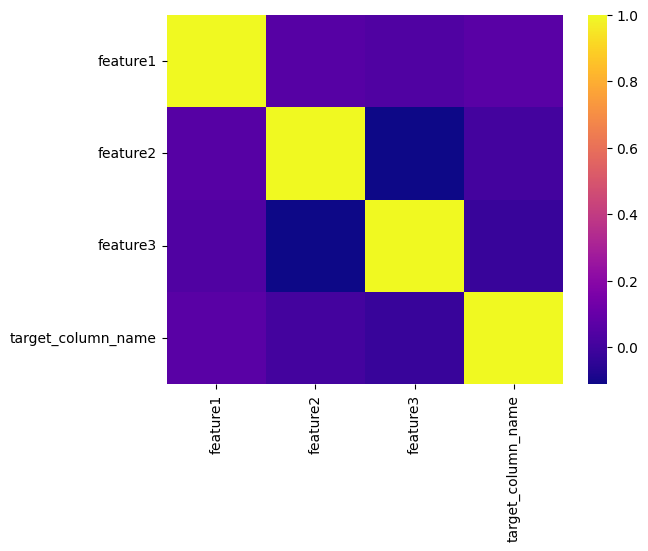

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 1980x630 with 0 Axes>

<Figure size 900x450 with 0 Axes>

<Figure size 900x450 with 0 Axes>

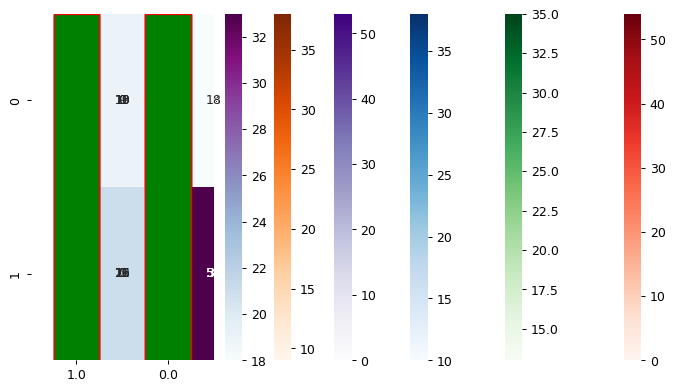

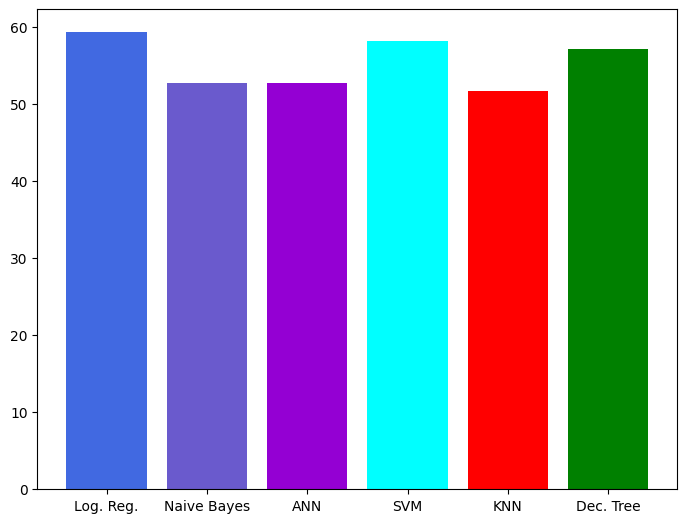

MODEL-1 - Logistic Regression Error Rate: 40.65934065934066 %
MODEL-2 - Naive Bayes Error Rate: 47.25274725274725 %
MODEL-3 - Artificial Neural Network Error Rate: 47.25274725274725 %
MODEL-4 - Support Vector Machine Error Rate: 41.75824175824175 %
MODEL-5 - K-Nearest Neighbours Error Rate: 48.35164835164834 %
MODEL-6 - Decision Tree Error Rate: 42.85714285714286 %


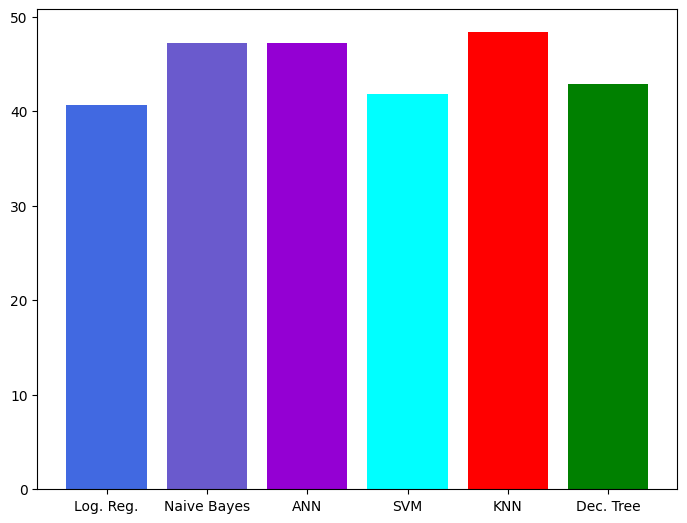

Accuracy: 1.0
Confusion Matrix:
[[ 8  0]
 [ 0 12]]


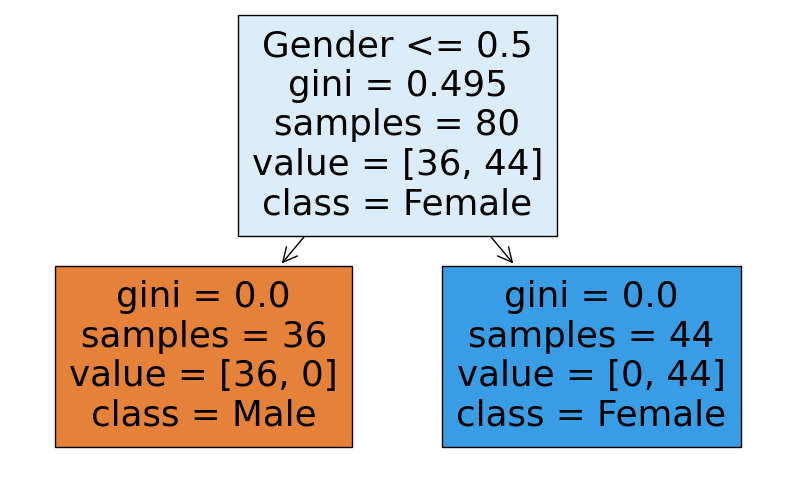

In [ ]:
for notebook_file in notebook_files:
    # Extract the base filename without the path
    notebook_name = os.path.basename(notebook_file)

    with open(notebook_file, 'r') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)

    # Initialize variables for tracking
    total_code_blocks = 0
    successfully_executed_code_blocks = 0
    execution_errors = 0
    start_time = time.time()

    # Iterate through notebook cells
    for cell in notebook_content['cells']:
        if cell['cell_type'] == 'code':
            code_lines = cell['source'].split('\n')
            total_code_blocks += 1
            try:
                # Execute the code
                exec('\n'.join(code_lines))
                successfully_executed_code_blocks += 1
            except Exception as e:
                execution_errors += 1

    # Calculate grading scale and execution time
    grading_scale = calculate_grading_scale(successfully_executed_code_blocks, total_code_blocks)
    execution_time = time.time() - start_time

    # Categorize the grading scale
    if grading_scale >= 90:
        grade_category = 'Very Good'
    elif grading_scale >= 75:
        grade_category = 'Good'
    elif grading_scale >= 60:
        grade_category = 'Satisfactory'
    elif grading_scale >= 50:
        grade_category = 'Sufficient'
    else:
        grade_category = 'Fail'

    # Append information to the scores list
    scores.append({
        'Notebook Name': notebook_name,
        'Errors/Warnings Found': execution_errors,
        'Grading Scale': grading_scale,
        'Grade Category': grade_category,
        'Execution Time (s)': execution_time
    })

# Create a DataFrame from the scores list
score_df = pd.DataFrame(scores)

In [ ]:
score_df.head()

,Notebook Name,Errors/Warnings Found,Grading Scale,Grade Category,Execution Time (s)
0,IBM_Attrition_Aryan_Bajaj.ipynb,18,79.310345,Good,5.137953
1,Prediction_Using_Decision_Tree.ipynb,0,100.000000,Very Good,0.236019
2,titanic_survival_with_Errors.ipynb,2,0.000000,Fail,0.003437


# Marking Notebooks on the Basis of Explanability, Task and Codes & Documentation Style

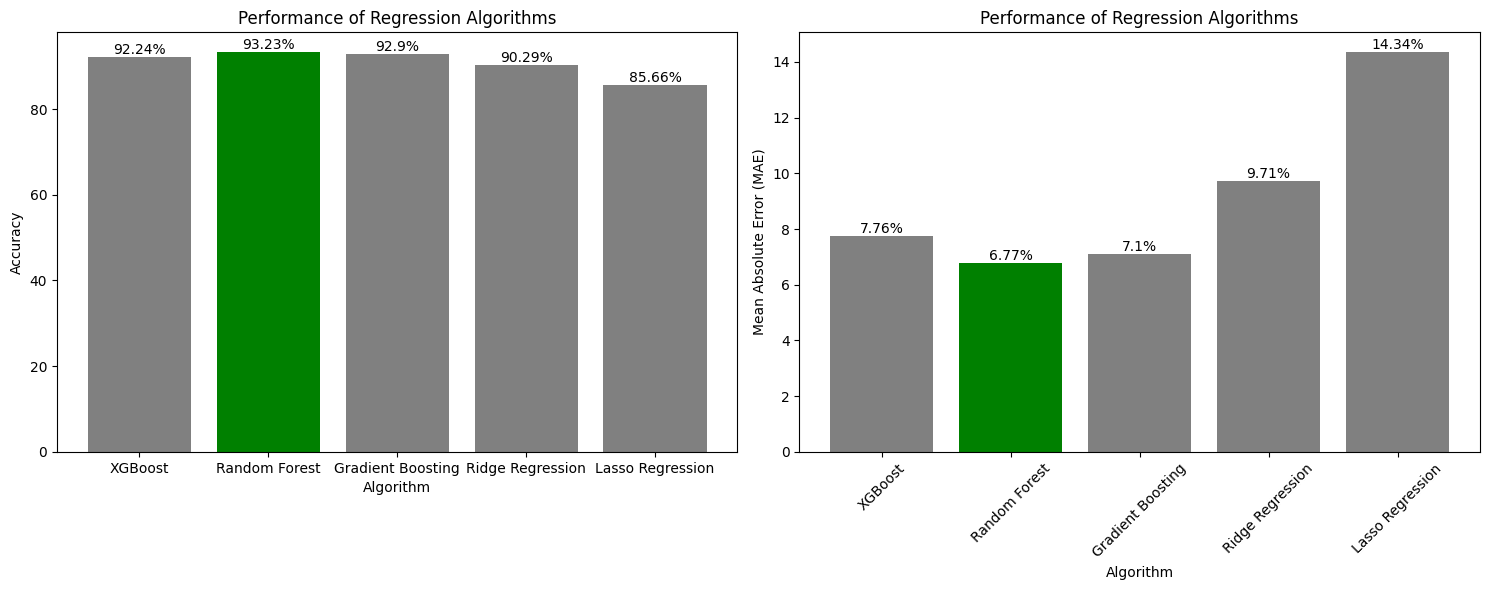

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import yaml
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load historical data
historical_data = pd.read_csv('/content/Scraped Notebook of 171 Notebooks with Marks.csv')

# Replace NaN values in 'Code Comments' column
historical_data['Code Comment'].fillna('No Code Comments found in this notebook', inplace=True)

# Convert continuous marks to grade labels
def map_to_grade(marks):
    if marks < 49:
        return 'Fail'
    elif 50 <= marks < 69:
        return 'Sufficient'
    elif 60 <= marks < 74:
        return 'Satisfactory'
    elif 75 <= marks < 89:
        return 'Good'
    else:
        return 'Very Good'

historical_data['Grade'] = historical_data['Marks'].apply(map_to_grade)

# Split data into training and testing sets
train_data, test_data = train_test_split(historical_data, test_size=0.2, random_state=42)

# Define targets
X_train = train_data['Documentation Text'] + ' ' + train_data['Code Used']
y_train = train_data['Marks']
X_test = test_data['Documentation Text'] + ' ' + test_data['Code Used']
y_test = test_data['Marks']

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Algorithm', 'MAE'])

# Define the list of algorithms
algorithms = [
    ('XGBoost', XGBRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

# Loop through each algorithm
for algorithm_name, algorithm in algorithms:
    # Define a pipeline for the entire process
    model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', algorithm)
    ])

    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, y_train)

    # Evaluate the model on the testing set
    predictions = model_pipeline.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, predictions)

    # Store results in the DataFrame
    results_df = results_df.append({'Algorithm': algorithm_name, 'MAE': mae}, ignore_index=True)

# Plot the results with annotations
plt.figure(figsize=(15, 6))

# Determine the color for each bar
colors = ['green' if val == results_df['MAE'].min() else 'grey' for val in results_df['MAE']]

# First subplot (left side)
plt.subplot(1, 2, 1)
bars_accuracy = plt.bar(results_df['Algorithm'], 100 - results_df['MAE'], color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Performance of Regression Algorithms')

# Adding Annotation for accuracy
for bar in bars_accuracy:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{yval}%', ha='center', va='bottom')

# Second subplot (right side)
plt.subplot(1, 2, 2)
bars_mae = plt.bar(results_df['Algorithm'], results_df['MAE'], color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance of Regression Algorithms')

# Adding Annotation for MAE
for bar in bars_mae:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{yval}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify the algorithm with the minimum MAE
best_algorithm = results_df.loc[results_df['MAE'].idxmin(), 'Algorithm']

# Find the pipeline corresponding to the best algorithm
best_pipeline = next(p for p in algorithms if p[0] == best_algorithm)[1]

# Define a new pipeline with text vectorization
best_pipeline_with_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', best_pipeline)
])

# Fit the best pipeline on the full training data
best_pipeline_with_tfidf.fit(X_train, y_train)

# Predictions using the best model
best_predictions = best_pipeline_with_tfidf.predict(X_test)

# Append the predictions to the original data frame
test_data['Predicted Marks'] = best_predictions.round(0).astype(int)

# Apply the mapping to get the predicted grades
test_data['Predicted Grade'] = test_data['Predicted Marks'].apply(map_to_grade)

# Create a new DataFrame 'results' and set 'Project Title' as the index
result_columns = ['Project Title', 'Documentation Text', 'Code Used',
       'Code Comment', 'Grade', 'Marks', 'Predicted Marks', 'Predicted Grade']

results = test_data[result_columns].set_index('Project Title')

In [ ]:
# Display the results
results.head()

,Documentation Text,Code Used,Code Comment,Grade,Marks,Predicted Marks,Predicted Grade
Project Title,,,,,,,
Face Detection with Python | Aman Kharwal,"In this article, I will show you how to create...",First you need to install the OpenCV library i...,No Code Comments found in this notebook,Good,80,53,Sufficient
Customer Personality Analysis with Python | Thecleverprogrammer,"Also, Read – 200+ Machine Learning Projects So...","from dataprep.eda import plot, plot_correlatio...",No Code Comments found in this notebook,Good,80,78,Good
Netflix Data Analysis with Python | Aman Kharwal,"Also, Read – 100+ Machine Learning Projects So...","Index(['show_id', 'type', 'title', 'director',...",No Code Comments found in this notebook,Sufficient,55,55,Sufficient
House Price Prediction with Python | Aman Kharwal,Predicting house prices can help to determine ...,"import pandas as pd\nhousing = pd.read_csv(""ho...",# Column Non-Null Count Dtype ...,Good,80,75,Good
WhatsApp Group Chat Analysis | Aman Kharwal,So I am a part of a WhatsApp group named as “D...,The chat you will get at the end does not need...,# Filtering out messages of particular user\n ...,Fail,40,66,Sufficient


In [ ]:
# Display the results
results.tail()

,Documentation Text,Code Used,Code Comment,Grade,Marks,Predicted Marks,Predicted Grade
Project Title,,,,,,,
Diamond Price Analysis using Python | Aman Kharwal,A diamond is one of the most expensive stones....,import pandas as pd\nimport numpy as np\nimpor...,No Code Comments found in this notebook,Good,80,79,Good
Life Expectancy Analysis with Python | Aman Kharwal,Life expectancy refers to the number of years ...,"Index(['Country', 'Year', 'Status', 'Life expe...",# Column Non-Null ...,Sufficient,55,56,Sufficient
Netflix Data Analysis with Python | Aman Kharwal,"Also, Read – 100+ Machine Learning Projects So...","Index(['show_id', 'type', 'title', 'director',...",No Code Comments found in this notebook,Sufficient,55,55,Sufficient
Uber Trips Analysis using Python | Aman Kharwal,Uber has been a major source of travel for peo...,"sns.set(rc={'figure.figsize':(12, 10)})\nsns.d...",No Code Comments found in this notebook,Sufficient,55,55,Sufficient
Video Game Sales Prediction Model with Python | Aman Kharwal,Video game sales analysis is a popular problem...,print(data.isnull().sum())\nprint(data.isnull(...,No Code Comments found in this notebook,Sufficient,55,55,Sufficient


In [ ]:
import os
import nbformat
import pandas as pd
import numpy as np

def process_notebook(file_path, model_pipeline):
    # Extract page title from the notebook name
    notebook_name = os.path.basename(file_path)
    page_title = os.path.splitext(notebook_name)[0]

    # Load the notebook
    with open(file_path, 'r', encoding='utf-8') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)

    # Extract all code blocks and output
    all_blocks = [cell for cell in notebook_content.cells]
    code = ""
    code_comments = ""
    documentation_text = ""

    code_keywords = ["import ",".head(5)",".fit","!pip" ,".columns","()",".shape", ".describe" ,"def ", "print(", "=", ".show()", "return", ".append(", "{", "}", "dtype:", ".head()", ".nunique("]
    data_keywords = "data"
    data_keywords = data_keywords.split()
    data_keywords = set(data_keywords)

    for block in all_blocks:
        if block.cell_type == 'code':
            text = block.source

            if any(keyword in text for keyword in code_keywords):
                # Replace '\n' with spaces only in code-related sections
                code += text.replace('\n', ' ') + "\n"
            else:
                documentation_text += text + "\n"
        elif block.cell_type == 'markdown':
            # If it's a Markdown cell, extract text
            documentation_text += block.source + "\n"

    # Handle Code Comment
    code_comment = code_comments.strip()
    if pd.isna(code_comment) or not code_comment or code_comment.isspace():
        code_comment = 'No Code Comments found'
        # Reduce 10 marks from the final grade
        new_predictions = model_pipeline.predict([documentation_text + ' ' + code])[0]
        new_predictions = np.maximum(new_predictions - 10, 0)
    else:
        # Predict grades using the trained model
        X_new = [documentation_text + ' ' + code]
        new_predictions = model_pipeline.predict(X_new)

    # Create a DataFrame with the data
    new_data = pd.DataFrame({
        'Project Title': [page_title],
        'Documentation Text': [documentation_text.strip()],
        'Code Used': [code.strip()],
        'Code Comment': [code_comment],
        'Predicted Marks': new_predictions.round(0).astype(int),
    })

    # Apply the mapping to get the predicted grades
    new_data['Predicted Grade'] = new_data['Predicted Marks'].apply(map_to_grade)

    return new_data

# Load multiple notebook files for processing
notebook_paths = [
    A, B, C,
]

# Process each notebook and concatenate the results
all_data = pd.concat([process_notebook(file_path, best_pipeline_with_tfidf) for file_path in notebook_paths], ignore_index=True)

# Display the combined processed data in tabular form
all_data_columns = ['Project Title', 'Documentation Text', 'Code Used', 'Code Comment', 'Predicted Marks', 'Predicted Grade']
all_data_table = all_data[all_data_columns]

print("Combined Processed Data:")
all_data_table.head()

Combined Processed Data:


,Project Title,Documentation Text,Code Used,Code Comment,Predicted Marks,Predicted Grade
0,IBM_Attrition_Aryan_Bajaj,# MyShiksha - Task1\nThis code imports essenti...,import matplotlib.pyplot as plt import seaborn...,No Code Comments found,62,Sufficient
1,Prediction_Using_Decision_Tree,This script demonstrates the creation and eval...,# Import necessary libraries import numpy as n...,No Code Comments found,66,Sufficient
2,titanic_survival_with_Errors,"Imports:\n\nLibraries like Pandas, NumPy, scik...",!pip install -q gradio\nimport pandas as pd im...,No Code Comments found,63,Sufficient


# Generating the Final Marks

In [ ]:
# Rename columns in all_data_table
all_data_table.rename(columns={
    'Predicted Marks': 'Marks For Code Style & Documentation Style',
    'Predicted Grade': 'Grade For Code Style & Documentation Style'
}, inplace=True)

# Rename columns in score_df
score_df.rename(columns={
    'Grading Scale': 'Grading Scale For Codes/Algorithm Runnability',
    'Grade Category': 'Grade Category For Codes/Algorithm Runnability'
}, inplace=True)

# Merge the two dataframes
Jupyter_Grading_System_Final_Result = pd.merge(all_data_table, score_df, left_index=True, right_index=True)

# Add new columns
Jupyter_Grading_System_Final_Result['Final Grade for the Notebook'] = Jupyter_Grading_System_Final_Result[[
    'Marks For Code Style & Documentation Style',
    'Grading Scale For Codes/Algorithm Runnability'
]].mean(axis=1)

# Map grades based on the given criteria
def map_grades(marks):
    if marks < 49:
        return 'Fail'
    elif 50 <= marks < 69:
        return 'Sufficient'
    elif 60 <= marks < 74:
        return 'Satisfactory'
    elif 75 <= marks < 89:
        return 'Good'
    else:
        return 'Very Good'

Jupyter_Grading_System_Final_Result['Final Grade Category'] = Jupyter_Grading_System_Final_Result['Final Grade for the Notebook'].apply(map_grades)

# Drop a few columns# Drop the 'Code Comment' column
Jupyter_Grading_System_Final_Result.drop(columns=['Notebook Name'], inplace=True)

In [ ]:
# Format 'Final Grade for the Notebook' column
Jupyter_Grading_System_Final_Result['Final Grade for the Notebook'] = Jupyter_Grading_System_Final_Result['Final Grade for the Notebook'].map('{:.2f}%'.format)

In [ ]:
# Display the final dataframe
Jupyter_Grading_System_Final_Result.head()

,Project Title,Documentation Text,Code Used,Code Comment,Marks For Code Style & Documentation Style,Grade For Code Style & Documentation Style,Errors/Warnings Found,Grading Scale For Codes/Algorithm Runnability,Grade Category For Codes/Algorithm Runnability,Execution Time (s),Final Grade for the Notebook,Final Grade Category
0,IBM_Attrition_Aryan_Bajaj,# MyShiksha - Task1\nThis code imports essenti...,import matplotlib.pyplot as plt import seaborn...,No Code Comments found,62,Sufficient,18,79.310345,Good,5.137953,70.66%,Satisfactory
1,Prediction_Using_Decision_Tree,This script demonstrates the creation and eval...,# Import necessary libraries import numpy as n...,No Code Comments found,66,Sufficient,0,100.000000,Very Good,0.236019,83.00%,Good
2,titanic_survival_with_Errors,"Imports:\n\nLibraries like Pandas, NumPy, scik...",!pip install -q gradio\nimport pandas as pd im...,No Code Comments found,63,Sufficient,2,0.000000,Fail,0.003437,31.50%,Fail


# Generating Feedbacks for further improvement

In [ ]:
def generate_comprehensive_feedback(row):
    feedback = f"Project Title: {row['Project Title']}\n"

    # Documentation Analysis
    doc_length = len(row['Documentation Text'].split())
    if doc_length < 100:
        feedback += "- The documentation is brief. Consider adding more details.\n"
    else:
        feedback += "- Good job on the documentation length. Ensure it's clear and comprehensive.\n"

    # Code Analysis
    if 'pandas' in row['Code Used']:
        feedback += "- Nice use of Pandas. Explore other libraries like NumPy for diverse operations.\n"
    else:
        feedback += "- Consider using Pandas for data manipulation tasks.\n"

    if row['Errors/Warnings Found'] > 0:
        feedback += f"- Address the {row['Errors/Warnings Found']} errors/warnings found in your code.\n"

    # Marks and Grades Analysis
    if row['Marks For Code Style & Documentation Style'] < 70:
        feedback += "- Improve your code and documentation style for better readability and structure.\n"

    if row['Grade Category For Codes/Algorithm Runnability'] != 'Very Good':
        feedback += "- Aim to enhance your code's algorithm runnability and efficiency.\n"

    # Overall Performance
    if row['Final Grade Category'] in ['Fail', 'Sufficient']:
        feedback += "- There's significant room for improvement in your overall project performance.\n"
    elif row['Final Grade Category'] in ['Good','Satisfactory']:
        feedback += "- Your project is on the right track. Keep improving for excellence.\n"
    else:
        feedback += "- Excellent work on the project! Keep up the good work.\n"

    return feedback

# Applying the comprehensive feedback function to each row in the dataframe
Jupyter_Grading_System_Final_Result['Comprehensive Feedback'] = Jupyter_Grading_System_Final_Result.apply(generate_comprehensive_feedback, axis=1)

# Displaying the updated dataframe head
Jupyter_Grading_System_Final_Result.head()

,Project Title,Documentation Text,Code Used,Code Comment,Marks For Code Style & Documentation Style,Grade For Code Style & Documentation Style,Errors/Warnings Found,Grading Scale For Codes/Algorithm Runnability,Grade Category For Codes/Algorithm Runnability,Execution Time (s),Final Grade for the Notebook,Final Grade Category,Comprehensive Feedback
0,IBM_Attrition_Aryan_Bajaj,# MyShiksha - Task1\nThis code imports essenti...,import matplotlib.pyplot as plt import seaborn...,No Code Comments found,62,Sufficient,18,79.310345,Good,5.137953,70.66%,Satisfactory,Project Title: IBM_Attrition_Aryan_Bajaj\n- Go...
1,Prediction_Using_Decision_Tree,This script demonstrates the creation and eval...,# Import necessary libraries import numpy as n...,No Code Comments found,66,Sufficient,0,100.000000,Very Good,0.236019,83.00%,Good,Project Title: Prediction_Using_Decision_Tree\...
2,titanic_survival_with_Errors,"Imports:\n\nLibraries like Pandas, NumPy, scik...",!pip install -q gradio\nimport pandas as pd im...,No Code Comments found,63,Sufficient,2,0.000000,Fail,0.003437,31.50%,Fail,Project Title: titanic_survival_with_Errors\n-...


# Checking the Plagiarism and Making an Alert

In [ ]:
api = "40013cbb91647674d9a92a116486c7a9"

In [ ]:
import requests

def check_plagiarism(api_key, notebook_content):
    url = "https://www.prepostseo.com/apis"
    data = {
        "key": api_key,
        "data": notebook_content,
        "lang": "auto",
    }

    try:
        response = requests.post(url, data=data)
        response.raise_for_status()

        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {str(e)}")
        return None

api_key = api
result = check_plagiarism(api_key,A)

if result:
    print("Checking for the Account Info:")
    print(result)


Checking for the Account Info:
{'user_name': 'Aryan Bajaj Trail Account', 'queries_limit': '200', 'queries_used': '0', 'account_status': 'Active'}


In [ ]:
import requests
import nbformat
import pandas as pd

def read_notebook_content(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as notebook_file:
            notebook_content = nbformat.read(notebook_file, as_version=4)
            text_data = ""

            for cell in notebook_content['cells']:
                if cell['cell_type'] == 'code':
                    text_data += cell['source'] + '\n'

            return text_data.strip()
    except Exception as e:
        print(f"Error reading notebook content for {file_path}: {str(e)}")
        return None

def check_plag(api_key, text_data, ignore_url=None):
    url = "https://www.prepostseo.com/apis/checkPlag"
    data = {
        "key": api_key,
        "data": text_data,
        "ignore": ignore_url,
    }

    try:
        response = requests.post(url, data=data)
        response.raise_for_status()

        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {str(e)}")
        return None

def automate_plagiarism_check(api_key, notebook_paths, ignore_url=None):
    results_data = []

    for notebook_path in notebook_paths:
        text_data = read_notebook_content(notebook_path)

        if text_data:
            result = check_plag(api_key, text_data, ignore_url)

            if result:
                unique_percent = result.get('uniquePercent', None)
                plagiarism_percentage = result.get('plagPercent', None)
                sources = result.get('sources', [])

                if unique_percent is not None and plagiarism_percentage is not None:
                    plagiarism_info = {
                        'NotebookName': notebook_path,
                        'Unique Percent Detected': unique_percent,
                        'Plagiarism Percent Detected': plagiarism_percentage,
                        'Links Detected': [source['link'] for source in sources]
                    }
                    results_data.append(plagiarism_info)
                    print(f"Notebook: {notebook_path}, Unique Percent: {unique_percent}, Plagiarism Percent: {plagiarism_percentage}")
                    print(f"Links Detected: {plagiarism_info['Links Detected']}")
                else:
                    print(f"Unique percent or plagiarism percent not found in the response for {notebook_path}.")
                    print("Response:", result)
            else:
                print(f"Error in plagiarism check for {notebook_path}.")
        else:
            print(f"Error in reading notebook content for {notebook_path}.")

    # Create a DataFrame from the results data
    df = pd.DataFrame(results_data)
    return df

# Replace 'your_api_key' with your actual PrePost SEO API key
api_key = api

# Replace the list of notebook paths directly
notebook_paths = [
    A,
    B,
    C
]

# Replace 'your_ignore_url' with the URL you want to ignore in plagiarism check (if any)
ignore_url = 'your_ignore_url'

result_dataframe = automate_plagiarism_check(api_key, notebook_paths, ignore_url)


Notebook: /content/IBM_Attrition_Aryan_Bajaj.ipynb, Unique Percent: 95, Plagiarism Percent: 5
Links Detected: ['https://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection', 'https://www.statology.org/logistic-regression-python/', 'https://stackoverflow.com/questions/36511533/how-to-fix-importerror-cannot-import-name-mlpclassifier', 'https://stackoverflow.com/questions/70135105/im-trying-to-import-kneihgborsclassifier-from-sklearn-neighbors', 'https://scikit-learn.org/stable/modules/tree.html', 'https://matplotlib.org/stable/users/getting_started/index.html']
Notebook: /content/Prediction_Using_Decision_Tree.ipynb, Unique Percent: 88, Plagiarism Percent: 12
Links Detected: ['https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html', 'https://scikit-learn.org/stable/modules/tree.html']
Notebook: /content/titanic_survival_with_Errors.ipynb, Unique Percent: 35, Plagiarism Percent: 65
Links Detected: ['https://www.gradio.a

In [ ]:
import requests

def check_plagiarism(api_key, notebook_content):
    url = "https://www.prepostseo.com/apis"
    data = {
        "key": api_key,
        "data": notebook_content,
        "lang": "auto",
    }

    try:
        response = requests.post(url, data=data)
        response.raise_for_status()

        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {str(e)}")
        return None

api_key = api
result = check_plagiarism(api_key,A)

if result:
    print("Checking for the Account Info:")
    print(result)


Checking for the Account Info:
{'user_name': 'Aryan Bajaj Trail Account', 'queries_limit': '200', 'queries_used': '159', 'account_status': 'Active'}


In [ ]:
result_dataframe.head()

,NotebookName,Unique Percent Detected,Plagiarism Percent Detected,Links Detected
0,/content/IBM_Attrition_Aryan_Bajaj.ipynb,95,5,[https://stackoverflow.com/questions/40704484/...
1,/content/Prediction_Using_Decision_Tree.ipynb,88,12,[https://scikit-learn.org/stable/modules/gener...
2,/content/titanic_survival_with_Errors.ipynb,35,65,"[https://www.gradio.app/docs/checkboxgroup, ht..."


In [ ]:
# Selecting columns from result_dataframe
result_columns = result_dataframe[['Unique Percent Detected', 'Plagiarism Percent Detected', 'Links Detected']]

# Selecting columns from Jupyter_Grading_System_Final_Result
jgs_columns = Jupyter_Grading_System_Final_Result[['Project Title',
                                                   'Documentation Text',
                                                   'Code Used',
                                                   'Marks For Code Style & Documentation Style',
                                                   'Grade For Code Style & Documentation Style',
                                                   'Errors/Warnings Found',
                                                   'Grading Scale For Codes/Algorithm Runnability',
                                                   'Grade Category For Codes/Algorithm Runnability',
                                                   'Execution Time (s)',
                                                   'Final Grade for the Notebook',
                                                   'Final Grade Category',
                                                   'Comprehensive Feedback']]

# Merge the selected columns into a new DataFrame
JGS = pd.concat([jgs_columns, result_columns], axis=1)

In [ ]:
JGS.set_index('Project Title', inplace=True)

In [ ]:
# Add a new column based on the condition
JGS['Plagiarism_Flag'] = np.where((JGS['Plagiarism Percent Detected'] > 11) & (JGS['Plagiarism Percent Detected'] < 50), '🟡',
                                  np.where(JGS['Plagiarism Percent Detected'] > 15, '🔴', '🟢'))

In [ ]:
JGS.head()

,Documentation Text,Code Used,Marks For Code Style & Documentation Style,Grade For Code Style & Documentation Style,Errors/Warnings Found,Grading Scale For Codes/Algorithm Runnability,Grade Category For Codes/Algorithm Runnability,Execution Time (s),Final Grade for the Notebook,Final Grade Category,Comprehensive Feedback,Unique Percent Detected,Plagiarism Percent Detected,Links Detected,Plagiarism_Flag
Project Title,,,,,,,,,,,,,,,
IBM_Attrition_Aryan_Bajaj,# MyShiksha - Task1\nThis code imports essenti...,import matplotlib.pyplot as plt import seaborn...,62,Sufficient,18,79.310345,Good,5.137953,70.66%,Satisfactory,Project Title: IBM_Attrition_Aryan_Bajaj\n- Go...,95,5,[https://stackoverflow.com/questions/40704484/...,🟢
Prediction_Using_Decision_Tree,This script demonstrates the creation and eval...,# Import necessary libraries import numpy as n...,66,Sufficient,0,100.000000,Very Good,0.236019,83.00%,Good,Project Title: Prediction_Using_Decision_Tree\...,88,12,[https://scikit-learn.org/stable/modules/gener...,🟡
titanic_survival_with_Errors,"Imports:\n\nLibraries like Pandas, NumPy, scik...",!pip install -q gradio\nimport pandas as pd im...,63,Sufficient,2,0.000000,Fail,0.003437,31.50%,Fail,Project Title: titanic_survival_with_Errors\n-...,35,65,"[https://www.gradio.app/docs/checkboxgroup, ht...",🔴


# Dashboard for Faculty

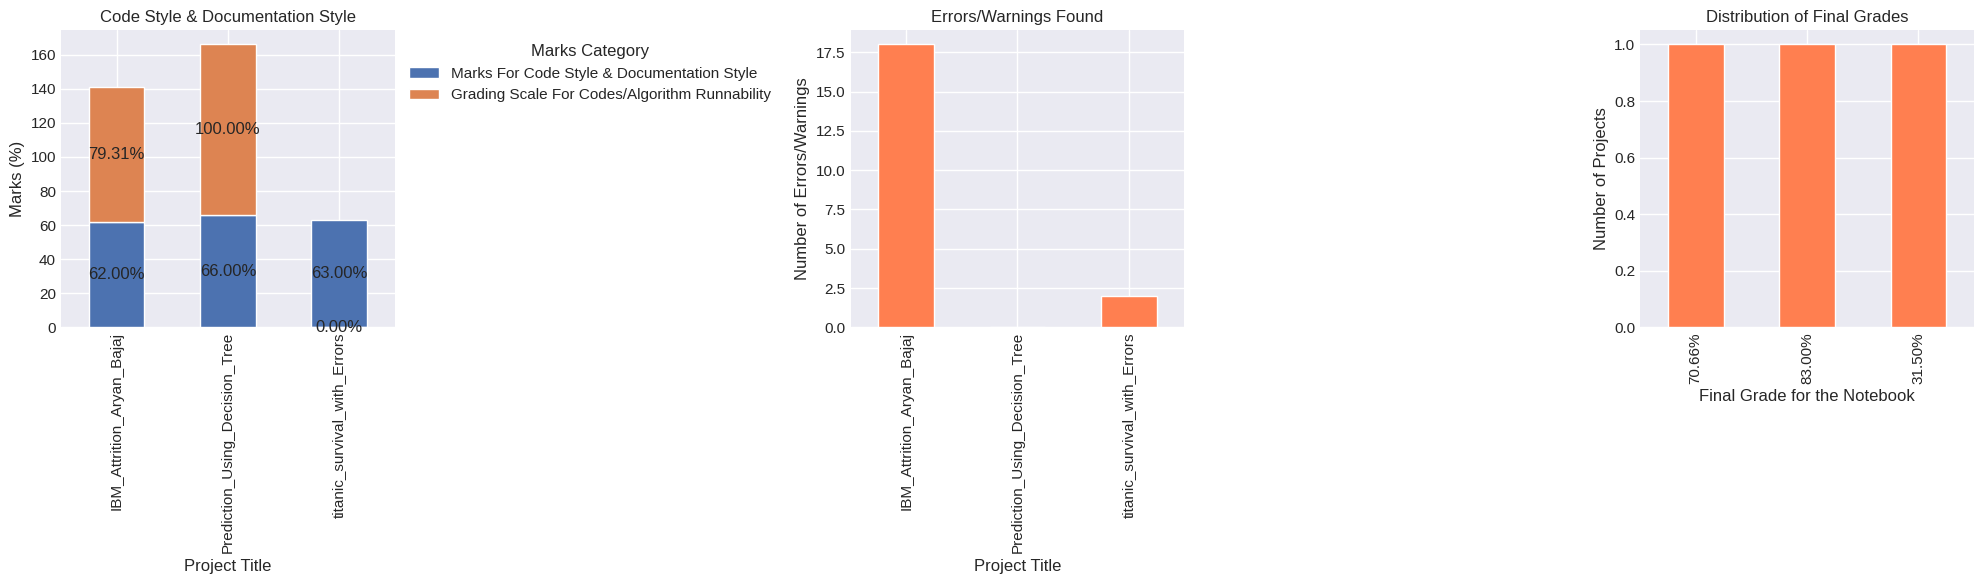

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
df = JGS

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a tight grid with side-by-side graphs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot 1: Stacked bar graph for Code Style & Documentation Style
df[['Marks For Code Style & Documentation Style', 'Grading Scale For Codes/Algorithm Runnability']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Code Style & Documentation Style')
axes[0].set_xlabel('Project Title')
axes[0].set_ylabel('Marks (%)')
axes[0].legend(title='Marks Category', loc='upper left', bbox_to_anchor=(1, 1))

# Annotate total marks percentage on each bar
for p in axes[0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[0].annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

# Plot 2: Bar graph for Errors/Warnings Found
df['Errors/Warnings Found'].plot(kind='bar', color='coral', ax=axes[1])
axes[1].set_title('Errors/Warnings Found')
axes[1].set_xlabel('Project Title')
axes[1].set_ylabel('Number of Errors/Warnings')

# Plot 3: Bar plot for the distribution of Final Grades
grade_counts = df['Final Grade for the Notebook'].value_counts()
grade_counts.plot(kind='bar', color='coral', ax=axes[2])
axes[2].set_title('Distribution of Final Grades')
axes[2].set_xlabel('Final Grade for the Notebook')
axes[2].set_ylabel('Number of Projects')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()